In [1]:
import pandas as pd
df_rentalcars = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
df_rentalcars.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns

## 단일 변수 연속형 정규 분포 확인
- 데이터 양이 5천개 기준 적용 방식 차이

### 데이터 건수가 5천개 이상 : Anderson Test

In [3]:
df_rentalcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

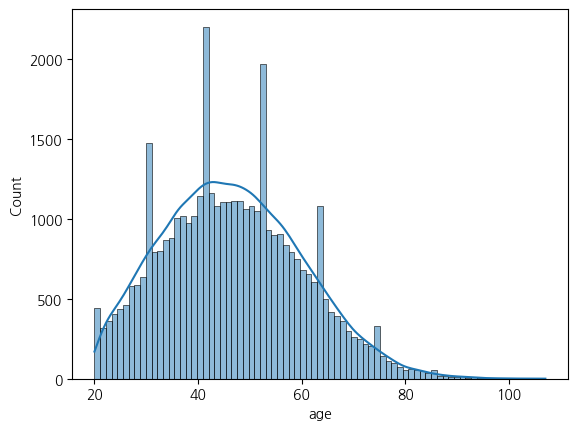

In [4]:
sns.histplot(data=df_rentalcars, x='age', kde=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

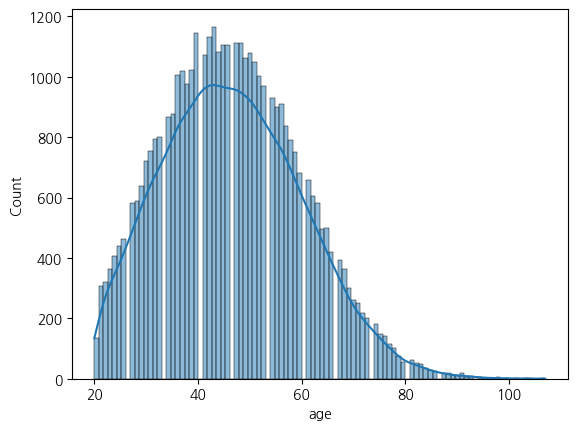

In [5]:
df_rentalcars_age = df_rentalcars['age'].dropna().copy()
sns.histplot(data=df_rentalcars_age, bins = 100, kde=True)
plt.show

In [8]:
df_rentalcars_age.count()

40509

In [11]:
import scipy.stats as stats
results = stats.anderson(df_rentalcars['age'].dropna())
results

AndersonResult(statistic=81.5597210113192, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=46.60828457873559, scale=13.465976879500062)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [14]:
results.significance_level, results.critical_values     #p-value list, 임계값 list
# [15. , 10. ,  5. ,  2.5,  1. ]
# age는 정규분포

(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.576, 0.656, 0.787, 0.918, 1.092]))

In [15]:
stats.anderson(df_rentalcars['Mileage'].dropna())

AndersonResult(statistic=58.82611209370225, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1967.9224123034387, scale=436.707328748971)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [16]:
results.significance_level, results.critical_values
# Mileage는 정규분포

(array([15. , 10. ,  5. ,  2.5,  1. ]),
 array([0.576, 0.656, 0.787, 0.918, 1.092]))

### 데이터 건수가 5천개 이하 : Shapiro Test

In [18]:
df_rentalcars_400_Mileage = df_rentalcars['Mileage'].dropna()[:400]
df_rentalcars_400_Mileage

0      1862.0
1      2532.0
2      2363.0
3      2449.0
4      1942.0
        ...  
492    1716.0
493    2343.0
496    2085.0
498    2758.0
499    2251.0
Name: Mileage, Length: 400, dtype: float64

<Axes: xlabel='Mileage', ylabel='Count'>

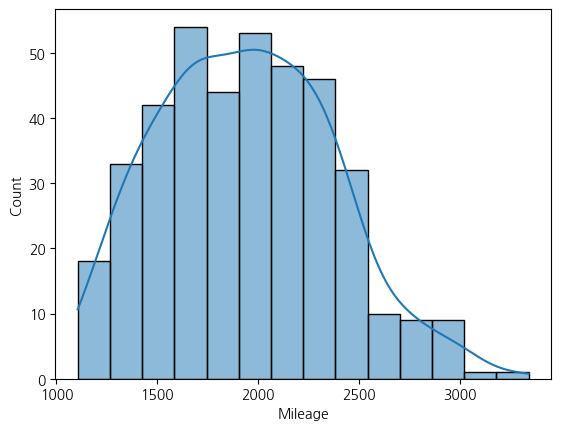

In [19]:
sns.histplot(data=df_rentalcars_400_Mileage, kde=True)

In [6]:
import scipy.stats as stats

In [20]:
stats.shapiro(df_rentalcars_400_Mileage) #p-value < 0.05 성립하므로 비정규분포

ShapiroResult(statistic=0.9862130629515703, pvalue=0.0007523920596174141)